# Datafun-06-eda
**Name:** Graham Miller
**Date:** 02/14/2024

**Purpose:** This project is an opportunity to use the tools like GitHub, Jupyter and pandas to create a custom exploratory analysis. It will analyze the Seaborn Tips dataset and provide visual aids for insight. The tips dataframe contains data from 244 seperate transactions and includes the total billm tip, sex (of the tipper), smoker (is there a smoker in the group), day, time, and size (of party). The goal of this eda is to provide insight into whether day of the week affects business, the frequency distribution of tip percent, and whether or not party size has an effect on tip percentage. 

### **Import Dependencies**

In [70]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

### **Acquiring Data**

In [71]:
# Load dataset into pandas datafram
df = sns.load_dataset('tips')

# Inspect the first rows of the dataframe
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### **Initial Data Inspection

In [72]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


### **Initial Descriptive Statistics**

In [73]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


### **Initial Data Distribution**

### Numerical Columns

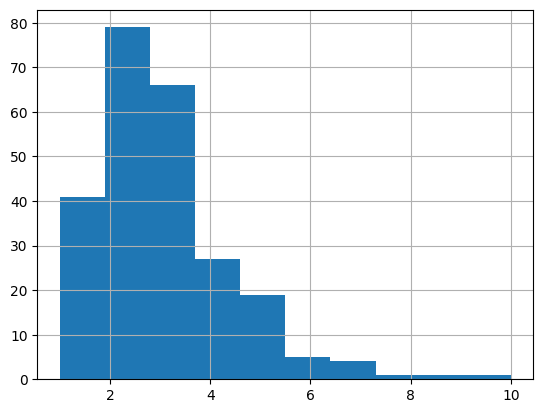

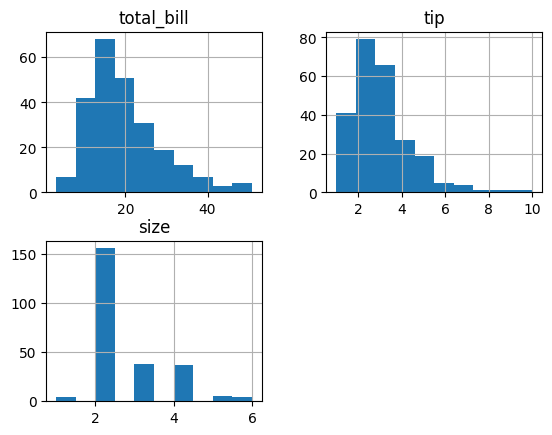

In [74]:
df['tip'].hist()

df.hist()

plt.show()

**Observations:** 
- Based on the graphs generated above, most tips from the transactions in the data fall somewhere between the $2-$4 range. 
- The party size of two is most popular for this restaraunt as around 2/3 of the parties were two people. 

### Categorical Columns

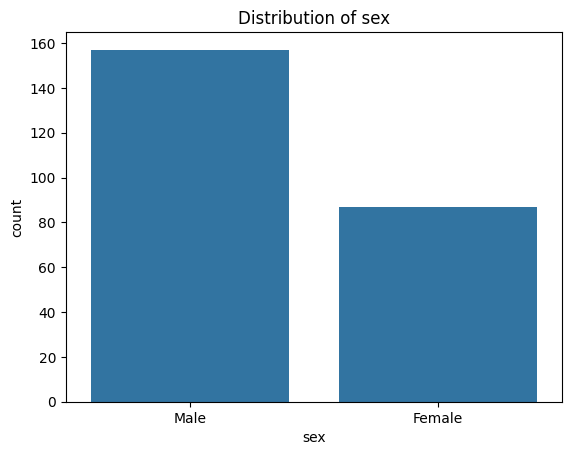

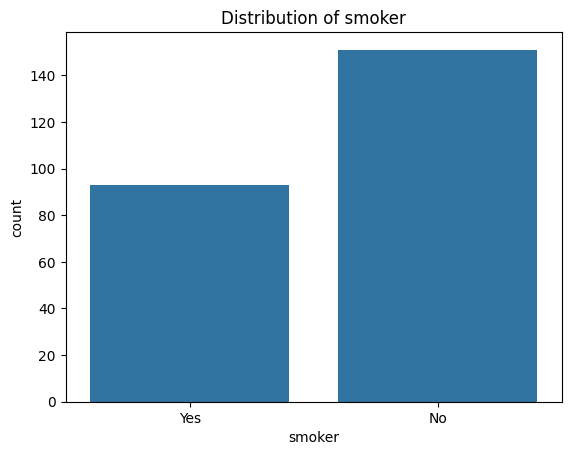

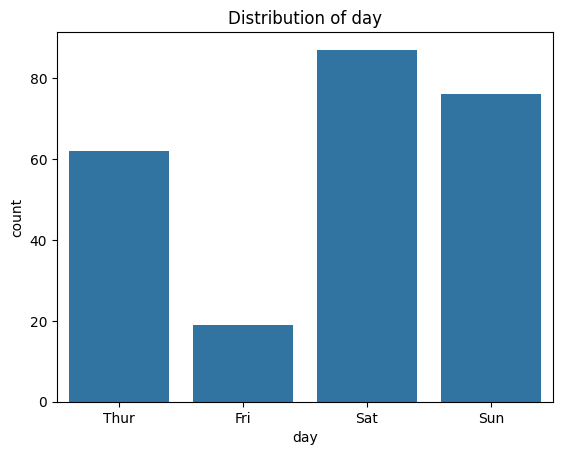

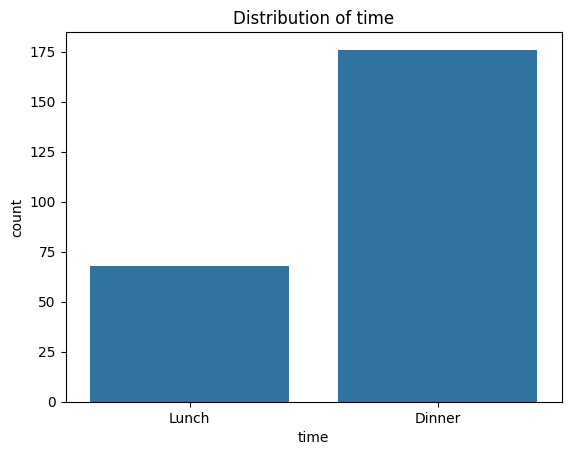

<function matplotlib.pyplot.show(close=None, block=None)>

In [75]:
df['smoker'].value_counts()

for col in df.select_dtypes(include=['object', 'category']).columns:

    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.show

**Observations:**
- There was over twice as many transactions recorded at dinner as opposed to lunch.
- Friday had the fewest transactions while Saturday had the most
- Non-Smoker to Smoker groups had a ratio of around 3:2
- Male to female payers had a ratio of almost 2:1

### **Data Transformation and Feature Engineering**
I used the rename function to capitalize all of the column names. I then added a new column that calculates the tip percentage of every transaction. 

In [76]:
# Renaming columns
df.rename(columns={'total_bill': 'Total_Bill'}, inplace=True)
df.rename(columns={'tip': 'Tip'}, inplace=True)
df.rename(columns={'sex': 'Sex'}, inplace=True)
df.rename(columns={'smoker': 'Smoker'}, inplace=True)
df.rename(columns={'day': 'Day'}, inplace=True)
df.rename(columns={'time': 'Time'}, inplace=True)
df.rename(columns={'size': 'Size'}, inplace=True)

# Adding a new column
df['Tip Percent'] = df['Tip'] / df['Total_Bill'] * 100




### **Pairplot Analysis**
- The goal of this pairplot is to plot every numerical column against all of the other numerical columns for each day of the week represented in the data. The hope is that relationships between the numerical colums for certain days of the week will be highlighted by these figures. 

<function matplotlib.pyplot.show(close=None, block=None)>

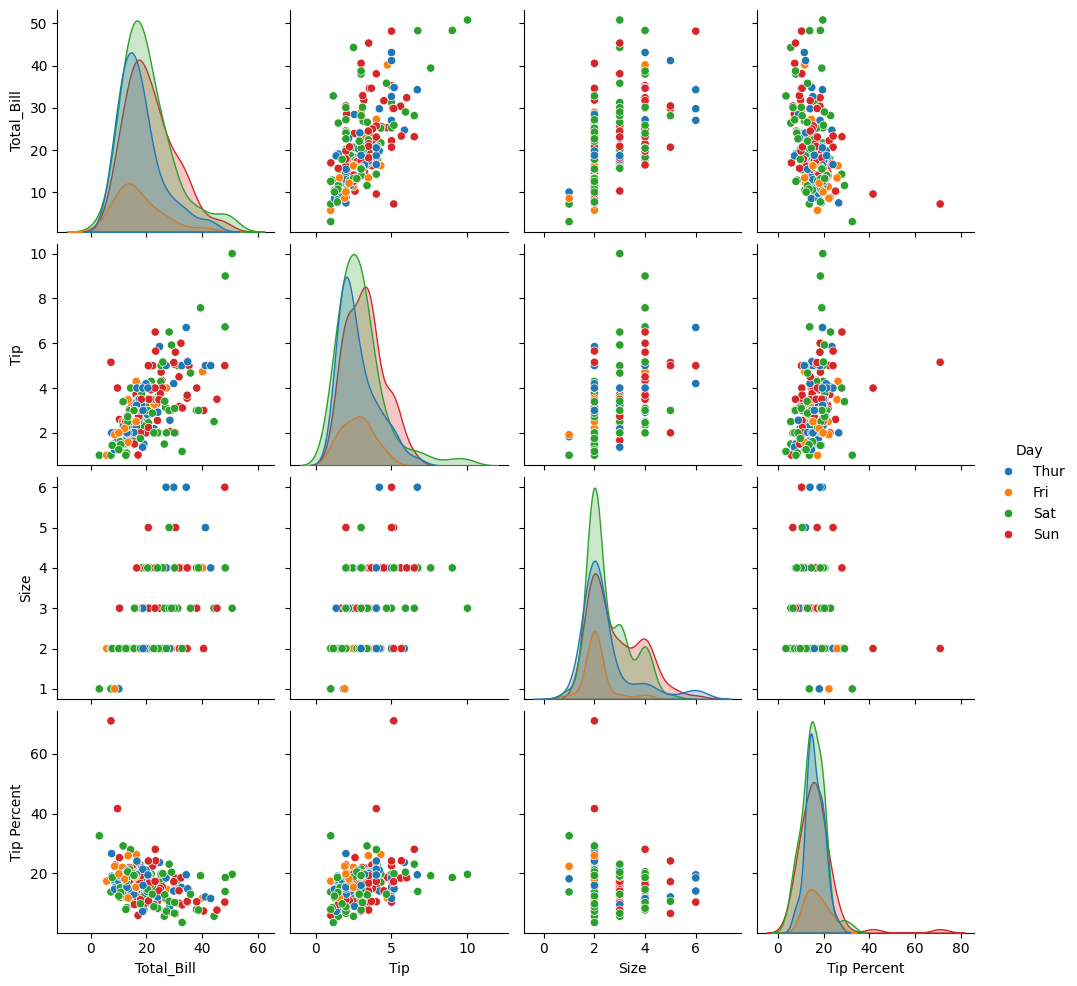

In [77]:
sns.pairplot(df, hue='Day')
plt.show

**Observations:** 
- There is no statistically significant difference of the total bill, tip, size of group, or tip ratio based on the day of the week. 

### **Histogram Analysis**
- The goal of the histogram analysis is to determine the tip percentage that occurs most frequently within the data, and the frequency distribution of tip percentage can describe how it is distributed as well as point out any outliers.

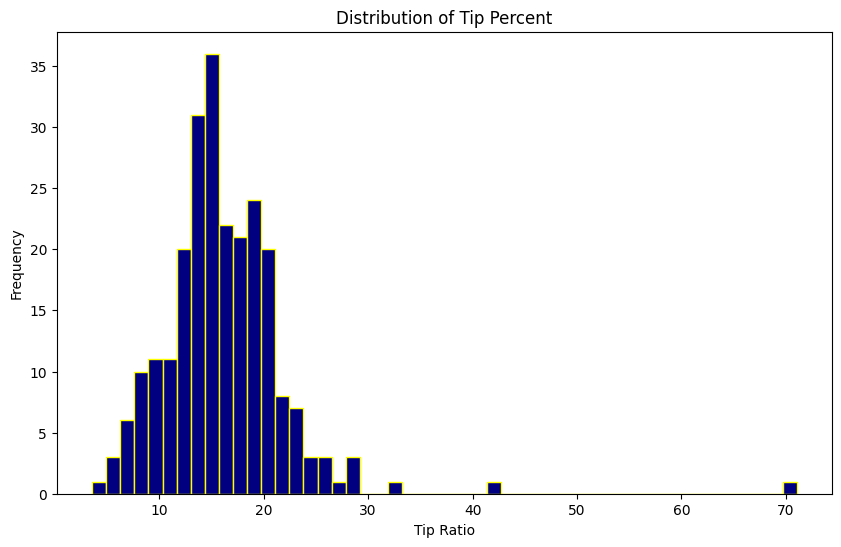

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(df['Tip Percent'], bins=50, color='navy', edgecolor='yellow')

plt.title('Distribution of Tip Percent')
plt.xlabel('Tip Ratio')
plt.ylabel('Frequency')

plt.show()

**Observations:** Based on the histogram, tip percentage looks to be almost normally distributed. There is a few outliers that occur within the data, with one person tipping over 40% and another over 70%. Based on the histogram, a tip of around 15% is the most frequently occuring tip within the data. 

### **Violin Plot Analysis**
- A violin plot is useful to display the summary statistics (quartiles and median) of the data. I used a violin plot to display the data for the tip percent based on the size of the party. Using the violin plot you can determine if the tip percentage varies between parties of different sizes. 

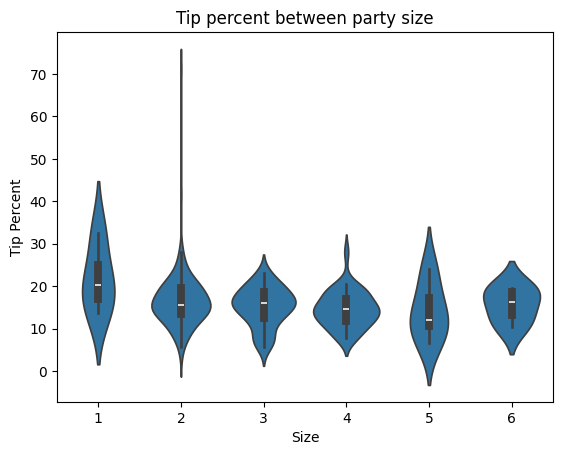

In [79]:
sns.violinplot(x='Size', y='Tip Percent', data=df)

plt.title('Tip percent between party size')
plt.show()

**Observations:** Based on the violin plot generated, there is no statistically significant difference between tip percentage and party size. All of the violin plots share overlap between quartiles, so you cannot safely draw conclusions about the size of the group and the percentage of the tip. 

### **Conculsion:**
The analysis of the tip data from the transactions using a pairplot has shown that there is no difference in total bill, tip, size of group, or tip percent based on the day of the week that it is. The analysis also found that the most frequent tip was around 15%, while there were some outliers of 40% and 70%. The violin plot showed that there was no difference in tip percentage based on group size. 